# Biodiversity Observations & Conservation Status Analysis

This project explores different species' conservation statuses and observation counts across national parks.

### Objectives:
- Compare observation counts across parks
- Examine distribution of conservation statuses within species categories
- Analyze how conservation status relates to observation frequency
- Identify potential patterns in endangered or threatened species

Missing conservation statuses are treated as "No Concern".
Colorblind-friendly palettes are used for accessibility.

In [1]:
# =================
# Imports & Styling
# =================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
# =================
# Load & Clean Data
# =================
observations = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv")

# Fill missing conservation status
species_info["conservation_status"] = species_info["conservation_status"].fillna("No Concern")

# Merge datasets
info_and_obs = pd.merge(
    observations,
    species_info,
    on="scientific_name"
)

print("Observations shape:", observations.shape)
print("Species info shape:", species_info.shape)
print("Merged dataset shape:", info_and_obs.shape)

Observations shape: (23296, 3)
Species info shape: (5824, 4)
Merged dataset shape: (25632, 6)


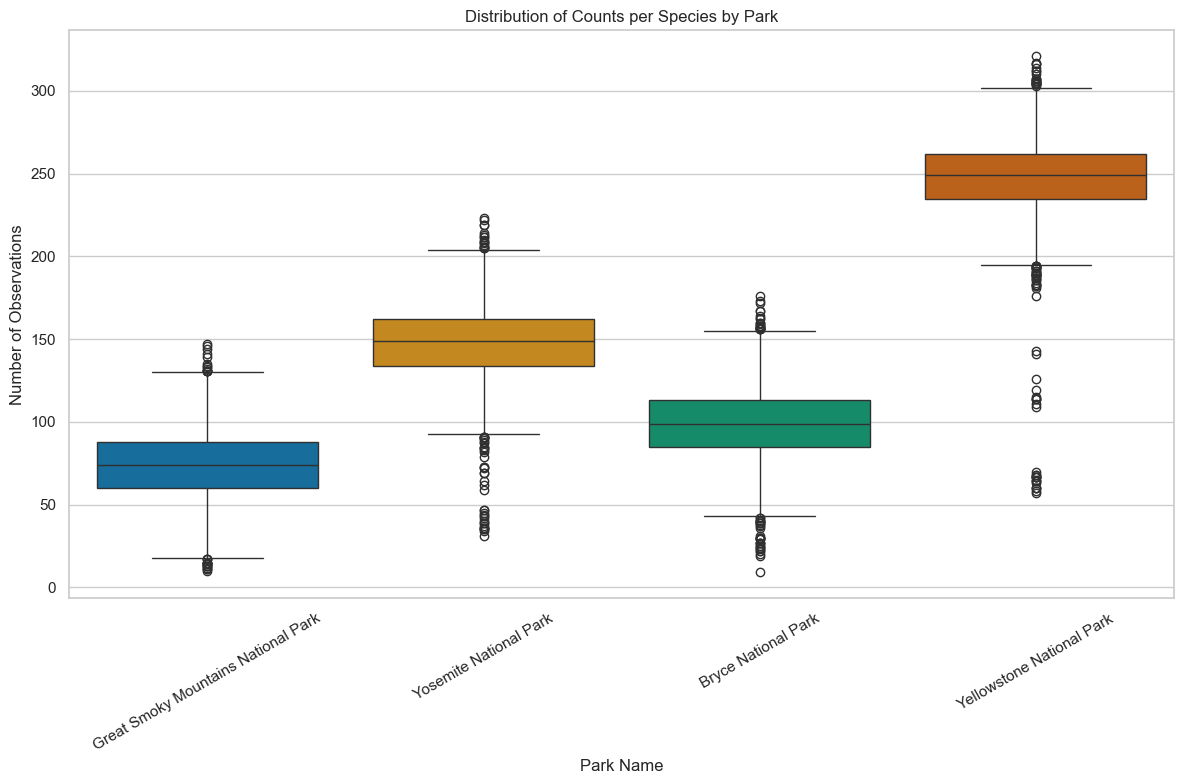

In [3]:
# ====================
# Observations by Park
# ====================
plt.figure(figsize=(12, 8))

sns.boxplot(
    data=observations,
    x="park_name",
    y="observations",
    palette="colorblind",
    hue="park_name"
)

plt.title("Distribution of Counts per Species by Park")
plt.xlabel("Park Name")
plt.ylabel("Number of Observations")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Observation counts vary between parks.

This may reflect:
- Park size differences
- Biodiversity variation
- Data collection intensity
- Habitat diversity

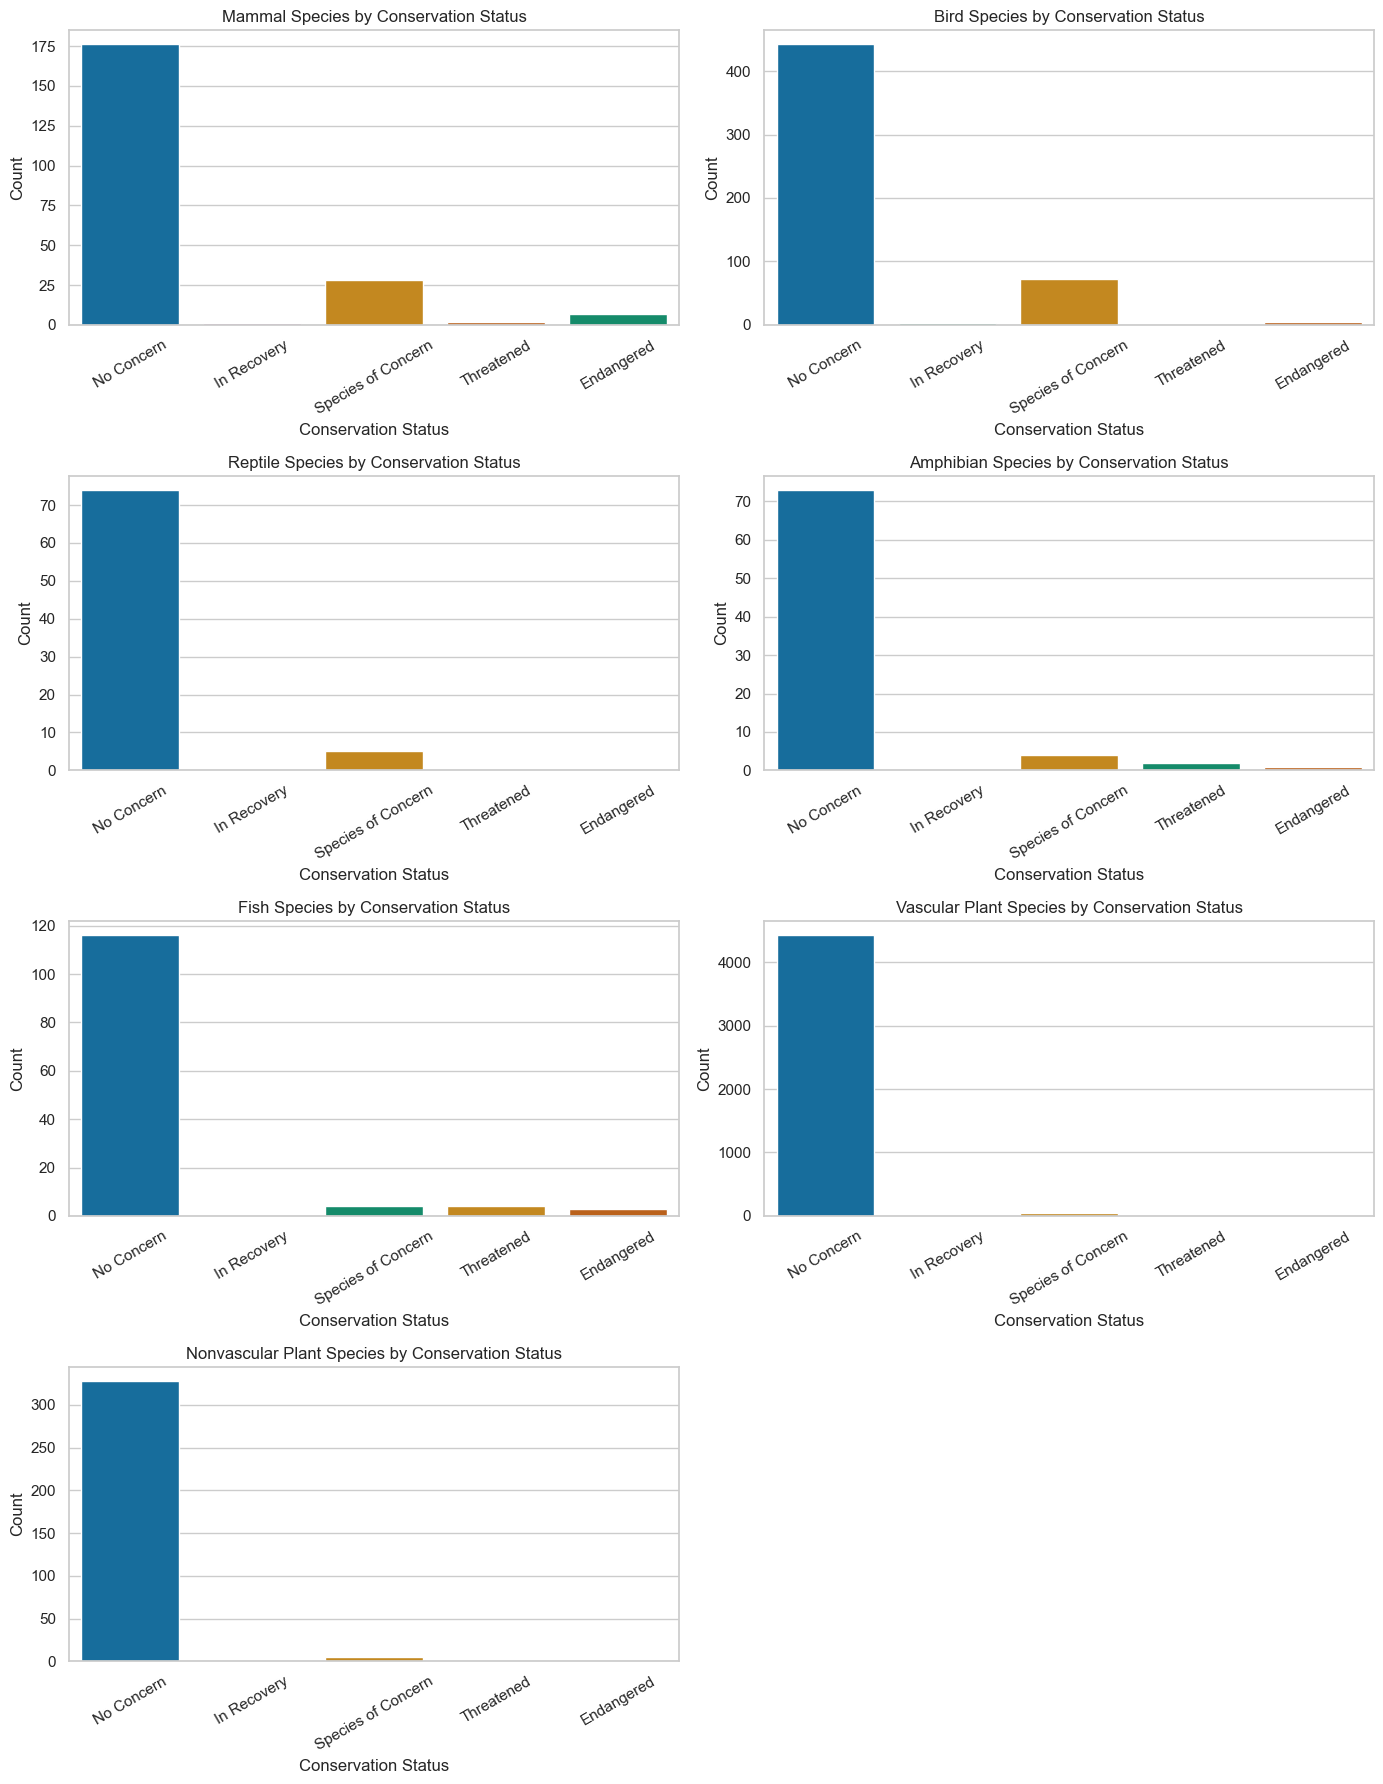

In [4]:
# ============================================
# Conservation Status Distribution by Category
# ============================================
status_order = [
    "No Concern",
    "In Recovery",
    "Species of Concern",
    "Threatened",
    "Endangered"
]

categories = species_info["category"].unique()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for i, category in enumerate(categories):
    subset = species_info[species_info["category"] == category]

    sns.countplot(
        data=subset,
        x="conservation_status",
        order=status_order,
        ax=axes[i],
        palette="colorblind",
        hue="conservation_status"
    )

    axes[i].set_title(f"{category} Species by Conservation Status")
    axes[i].set_xlabel("Conservation Status")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=30)

# Remove unused subplot if present
for j in range(len(categories), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Most species fall under "No Concern", as expected.

However, certain categories show higher concentrations of:
- Species of Concern
- Threatened
- Endangered

This suggests risk may be unevenly distributed across biological groups.

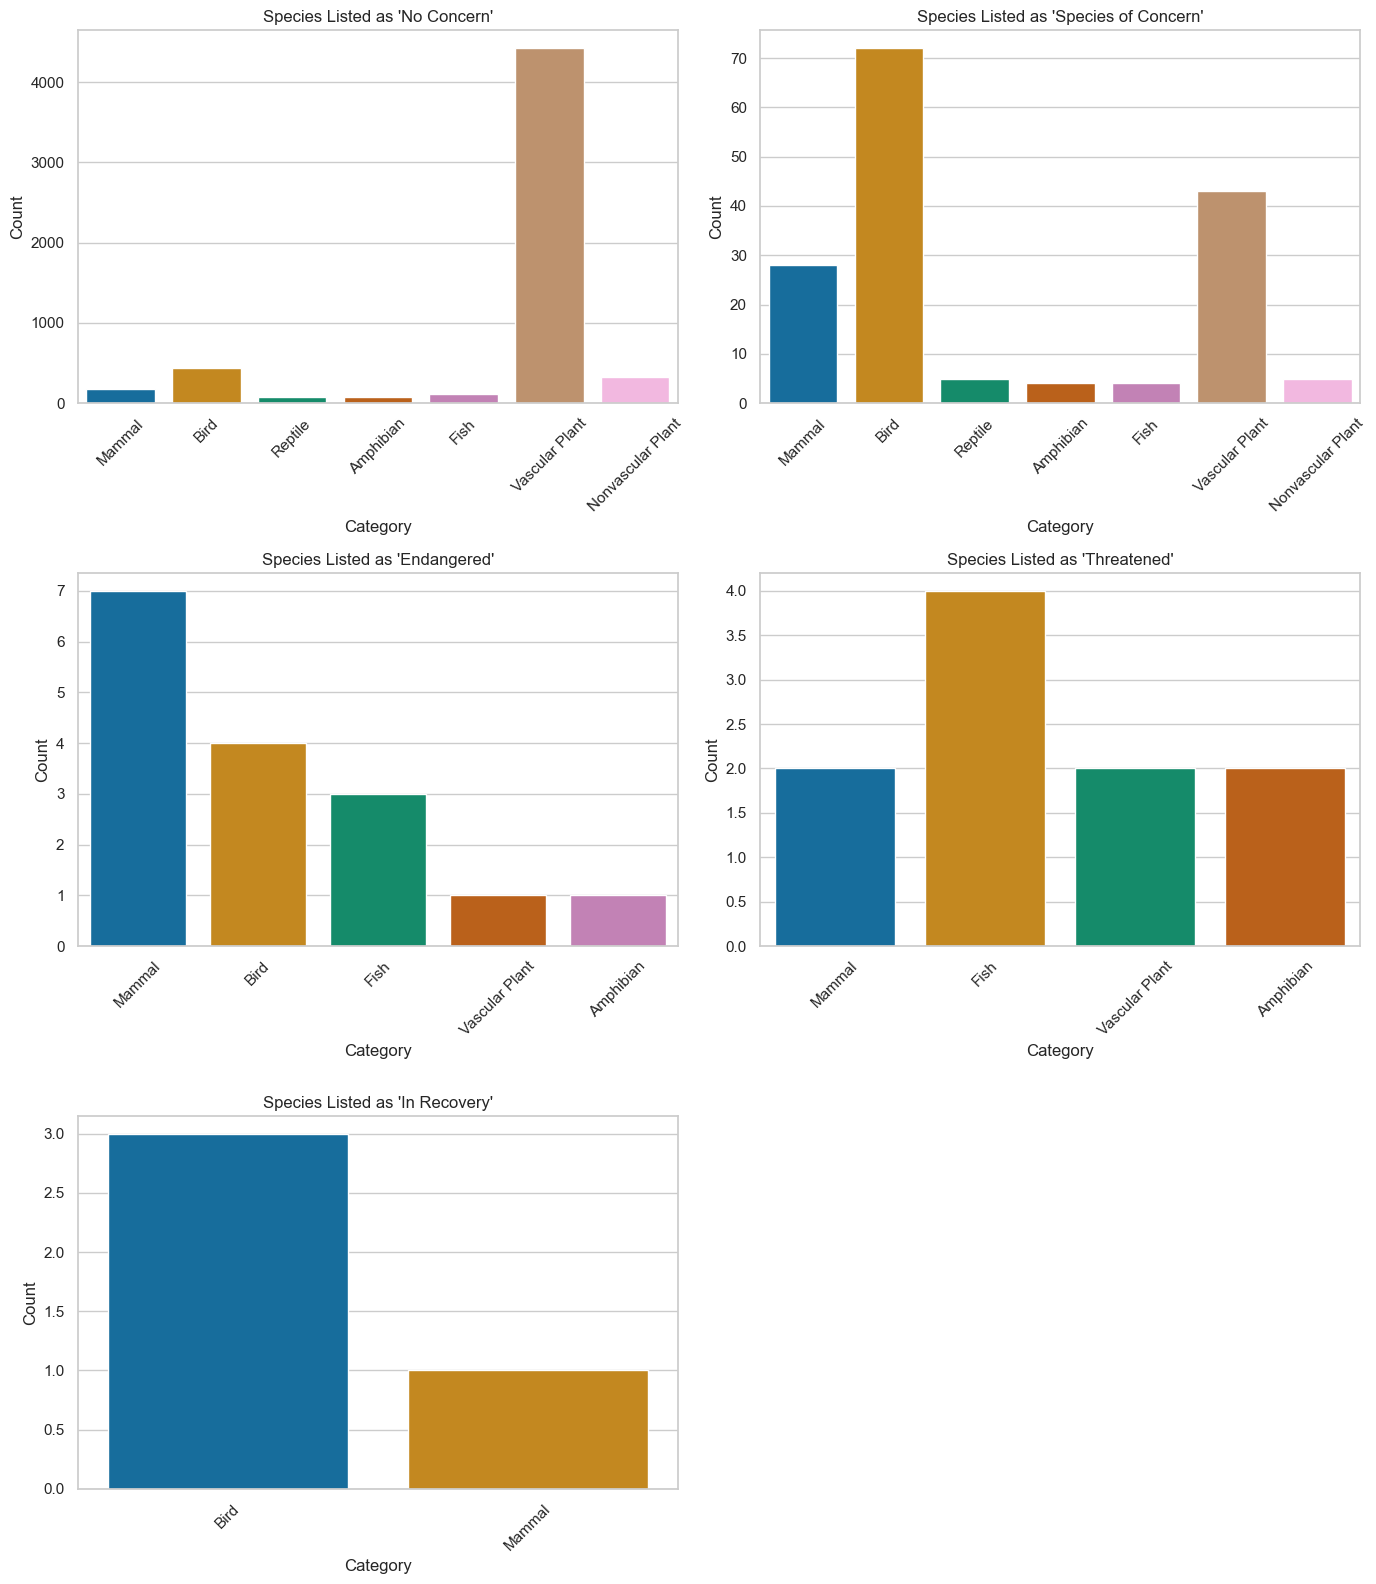

In [5]:
# =============================================================
# Species Category Distribution Within Each Conservation Status
# =============================================================
statuses = species_info["conservation_status"].unique()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
axes = axes.flatten()

for i, status in enumerate(statuses):
    subset = species_info[species_info["conservation_status"] == status]

    sns.countplot(
        data=subset,
        x="category",
        ax=axes[i],
        palette="colorblind",
        hue="category"
    )

    axes[i].set_title(f"Species Listed as '{status}'")
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=45)

for j in range(len(statuses), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Certain conservation statuses appear concentrated in specific categories.

For example:
- Mammals and birds often appear in higher-risk categories.
- Some categories show very few species at risk.

This may reflect ecological vulnerability differences.

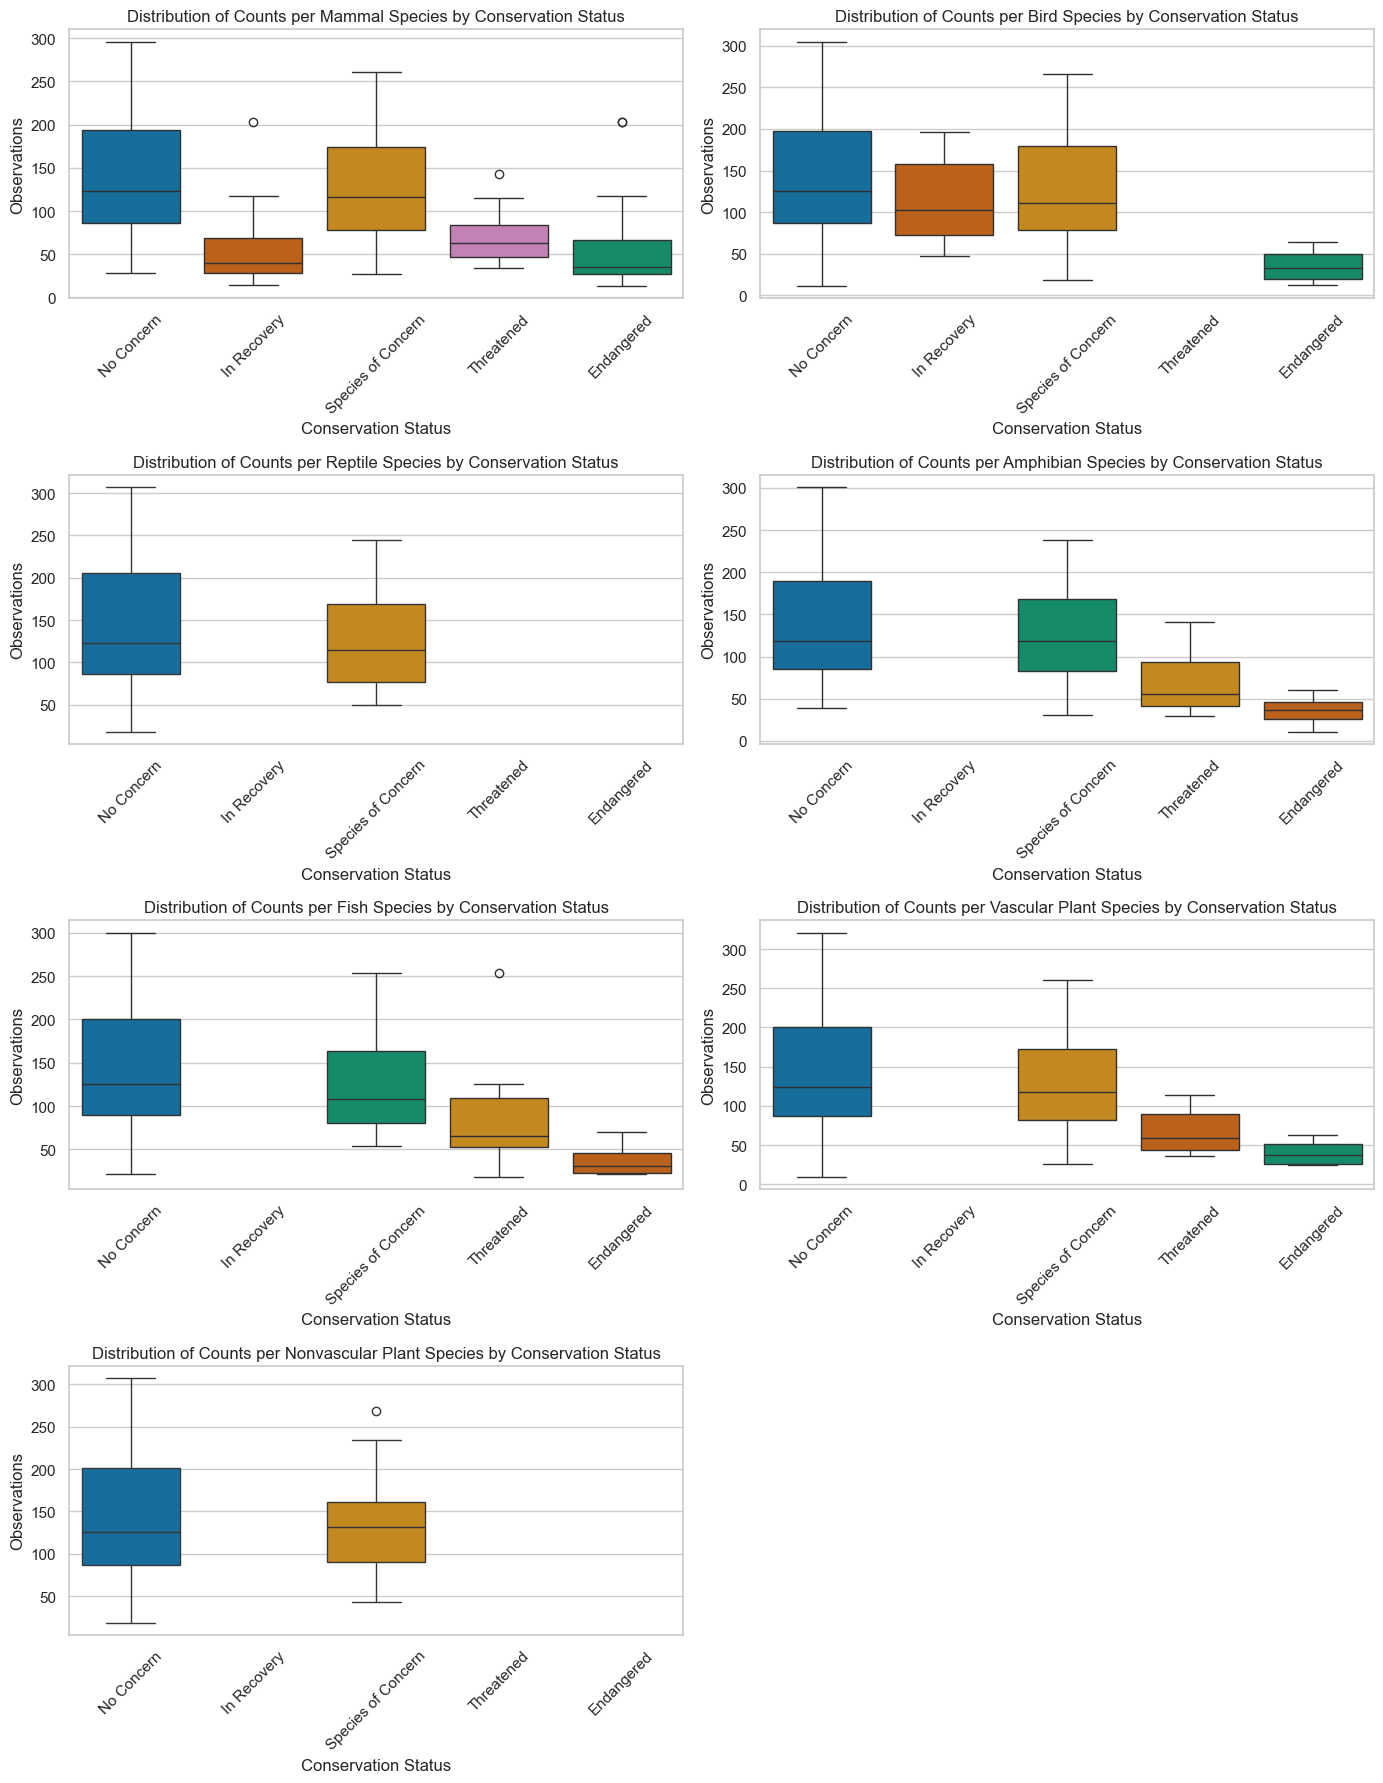

In [6]:
# ====================================================
# Observation Counts by Conservation Status & Category
# ====================================================
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for i, category in enumerate(categories):
    subset = info_and_obs[info_and_obs["category"] == category]

    sns.boxplot(
        data=subset,
        x="conservation_status",
        y="observations",
        order=status_order,
        ax=axes[i],
        palette="colorblind",
        hue="conservation_status"
    )

    axes[i].set_title(f"Distribution of Counts per {category} Species by Conservation Status")
    axes[i].set_xlabel("Conservation Status")
    axes[i].set_ylabel("Observations")
    axes[i].tick_params(axis="x", rotation=45)

for j in range(len(categories), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observation frequency does not necessarily correlate with conservation risk.

Possible explanations:
- High-risk species may have a decent amount of observation counts, but their habitat may only be limited to these parks.
- High-risk species may be more heavily monitored.
- Habitat distribution influences visibility, especially if their habitat reaches far beyond the parks (ie. bird species). 

Further statistical modeling could quantify these relationships.